#### Paper one
---
Modal disparities in spatiotemporal accessibility to non-work activities on the commute home from work in Warsaw, Poland
===

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

### parameters

In [2]:
B = 90
t_k = 20

### prepare trips.csv to the data needed

In [3]:
trips = pd.read_csv('data//10000.csv')
del trips['Unnamed: 0']

In [4]:
trips['Xij']=trips.TripsPrT+trips.TripsPuT
trips = trips[trips.Xij>0.01]

In [5]:
trips = trips[['Z_Rejon','POI','Do_Rejon','Czas_PrT','Czas_PuT']]

In [6]:
trips.columns = ['j','k','i','t_jki_Car','t_jki_PT']

In [7]:
trips.to_csv('data//paper_trips1.csv')

### data

In [8]:
trips = pd.read_csv('data//paper_trips1.csv')
del trips['Unnamed: 0']
trips.head()

,j,k,i,t_jki_Car,t_jki_PT
0,1,30,1,3.40,0.20
1,1,174,1,41.63,8.38
2,1,178,1,38.33,6.99
3,1,74,1,37.77,8.28
4,1,154,1,37.84,8.31


# 3.2.
The time-geographic accessibility of a person leaving work in zone j stopping at non-work location k on the way home in zone i is calculated as:

 $A_{jki} = max(0,B-(t_{jk}+t_{k}+t_{ki}))$  (1)

$B$ = travel time budget in minutes

$t_jk$  = travel time in minutes from work location j to non-work location k

$t_k$  = minimum time required to participate in activity at location k

$t_ki$  = travel time in minutes from non-work location k to home location i

$A_jki$  = number of minutes available for person working in location j and living in location i to consume goods or services at location k given available travel budget B and minimum activity duration $t_k$ .


In [9]:
trips['A_jki_Car'] = B - trips.t_jki_Car - t_k
trips.A_jki_Car[trips.A_jki_Car < 0] = 0
trips.A_jki_Car[trips.A_jki_Car > 0] = trips.A_jki_Car + t_k
trips['A_jki_PT'] = B - trips.t_jki_PT - t_k
trips.A_jki_PT[trips.A_jki_PT < 0] = 0
trips.A_jki_PT[trips.A_jki_PT > 0] = trips.A_jki_PT + t_k

C:\Python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Python27\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to b

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001014BA20>,
      dtype=object)

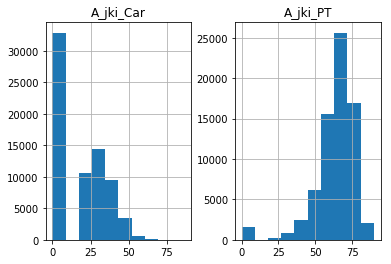

In [10]:
trips[['A_jki_Car','A_jki_PT']].hist()

The commute-based work-home accessibility, $A_{ji}^C$, is calculated by:

$A_{ji}^C = \frac{\sum_{k \in K} A_{jki}}{n} $ (2)

In [11]:
A_ji_C_Car = trips[trips.A_jki_Car>0].groupby(by=['i','j'])['A_jki_Car'].agg(['mean','min','max','std'])
A_ji_C_Car.to_csv('data//A_ji_C_Car.csv')
A_ji_C_Car.head()

,,mean,min,max,std
i,j,,,,
1,1,36.78,20.27,86.60,9.88
3,1,36.24,21.43,74.84,9.21
4,1,35.42,20.22,75.60,9.39
5,1,37.64,20.84,70.70,9.37
6,1,37.93,21.15,71.60,9.68


In [12]:
A_ji_C_PT = trips[trips.A_jki_PT>0].groupby(by=['i','j'])['A_jki_PT'].agg(['mean','min','max','std'])
A_ji_C_Car.to_csv('data//A_ji_C_Car.csv')
A_ji_C_PT.to_csv('data//A_ji_C_PT.csv')
A_ji_C_PT.head()

,,mean,min,max,std
i,j,,,,
1,1,67.24,26.02,89.80,11.78
3,1,68.69,27.49,87.71,11.74
4,1,68.64,27.51,88.21,11.76
5,1,69.18,27.76,87.25,11.73
6,1,69.14,28.61,87.26,11.69


Similarly, the commute-based home accessibility, $A_i^C$, is calculated by:

$A_{i}^C = \frac{\sum_{k \in K} A_{jki}}{n} $ (3)

In [13]:
A_i_C_Car = trips[trips.A_jki_Car>0].groupby(by=['i'])['A_jki_Car'].agg(['mean','min','max','std'])
A_i_C_Car.to_csv('data//A_i_C_Car.csv')
A_i_C_Car.head()

,mean,min,max,std
i,,,,
1,36.78,20.27,86.60,9.88
3,36.24,21.43,74.84,9.21
4,35.42,20.22,75.60,9.39
5,37.64,20.84,70.70,9.37
6,37.93,21.15,71.60,9.68


In [14]:
A_i_C_PT = trips[trips.A_jki_PT>0].groupby(by=['i'])['A_jki_PT'].agg(['mean','min','max','std'])
A_i_C_PT.to_csv('data//A_i_C_PT.csv')
A_i_C_PT.head()

,mean,min,max,std
i,,,,
1,67.24,26.02,89.80,11.78
3,68.69,27.49,87.71,11.74
4,68.64,27.51,88.21,11.76
5,69.18,27.76,87.25,11.73
6,69.14,28.61,87.26,11.69


# 3.3 Home-based accessibility

For comparisons with previous modal accessibility disparity studies described earlier, a time-geographic accessibility metric is developed to measure the time available to consume goods or services at location k based on a trip from and to the home location i. The number of minutes available on a home-based trip, A_iki^ , is calculated by:

$A_{iki} = max(0,B-(t_{ik}+t_{k}+t_{ki}))$ (4)

In [15]:
hb = trips[trips.i == trips.j]

$A_{i}^H = \frac{\sum_{k \in K} A_{iki}}{n} $ (5)

In [16]:
A_i_H_Car = hb[hb.A_jki_Car>0].groupby(by=['i'])['A_jki_Car'].agg(['mean','min','max','std'])
A_i_H_Car.to_csv('data//A_i_H_Car.csv')
A_i_H_Car.head()

,mean,min,max,std
i,,,,
1,36.78,20.27,86.60,9.88


In [17]:
A_i_H_PT = hb[hb.A_jki_PT>0].groupby(by=['i'])['A_jki_PT'].agg(['mean','min','max','std'])
A_i_H_PT.to_csv('data//A_i_H_PT.csv')
A_i_H_PT.head()

,mean,min,max,std
i,,,,
1,67.24,26.02,89.80,11.78


# 3.4 Modal accessibility disparity
We use both zonal measures of accessible time to derive metrics of the disparity between automobiles and public transit. We use a standardized disparity measure based on Kwok & Yeh (2004). The zonal commute-based modal disparity is given by:

$X^C_i = \frac{A_i^{C,PT}-A_i^{C,Car}}{A_i^{C,PT}+A_i^{C,Car}}$ (6)

In [18]:
X_i_C = pd.DataFrame((A_i_C_PT['mean'] - A_i_C_Car['mean'] )/(A_i_C_PT['mean']  + A_i_C_Car['mean'] ))
X_i_C.to_csv('data//X_i_C.csv')
X_i_C.head()

,mean
i,
1,0.29
3,0.31
4,0.32
5,0.30
6,0.29


Tand the zonal home-trip-based modal disparity is given by:

$X^H_i = \frac{A_i^{H,PT}-A_i^{H,Car}}{A_i^{H,PT}+A_i^{H,Car}}$  (7)

In [19]:
X_i_H = pd.DataFrame((A_i_H_PT['mean'] - A_i_H_Car['mean'])/(A_i_H_PT['mean'] + A_i_H_Car['mean']))
X_i_C.to_csv('data//X_i_H.csv')
X_i_C.head()

,mean
i,
1,0.29
3,0.31
4,0.32
5,0.30
6,0.29


We also calculate the regional average for each accessibility and disparity metric for single values that describe the whole city. They are:

$A^{C,PT} = 1/W \sum_i W_i \times A^{C,PT}_i$ 

In [20]:
W_s = pd.read_csv('data//10000.csv')
del W_s['Unnamed: 0']

In [21]:
W_s = W_s.groupby('Z_Rejon')['TripsPrT'].sum()
W = W_s.sum()